# (Homework) Week 7 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Dharun Ramesh\
**Email:** dr4075@nyu.edu

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

Observed 4 sixes out of 10 rolls
P(A | 4 sixes) = 0.035
P(B | 4 sixes) = 0.620
P(C | 4 sixes) = 0.345
True die: C


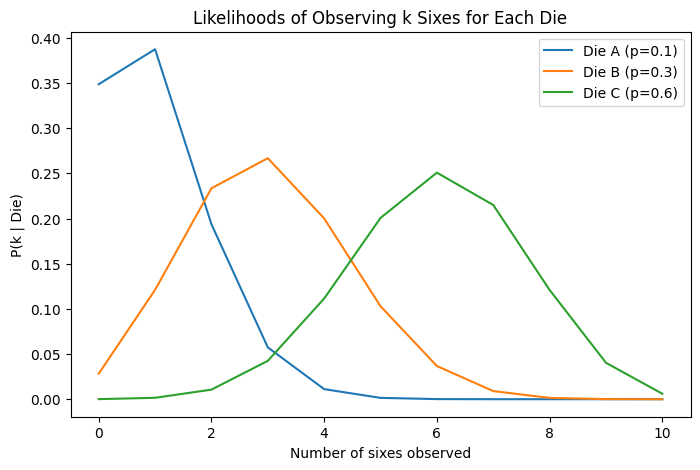

Accuracy over 100 rounds: 0.78


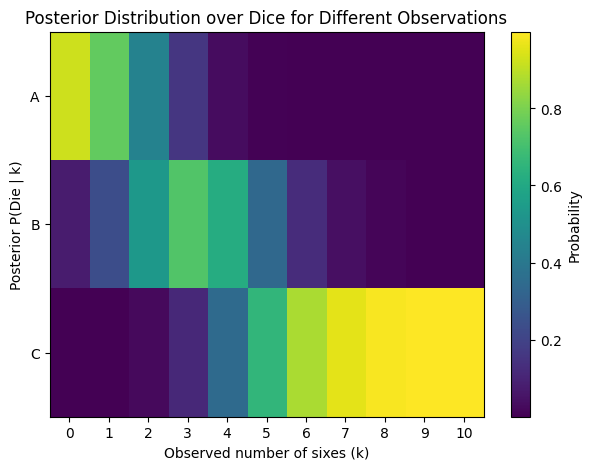

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = np.array([1/3, 1/3, 1/3])
n_rolls = 10

def binomial_prob(n, k, p):
    comb = math.comb(n, k)
    return comb * (p**k) * ((1-p)**(n-k))

def simulate_round():
    true_die = random.choice(dice_names)
    p = dice_probs[true_die]
    k = np.random.binomial(n_rolls, p)
    return true_die, k

def posterior_given_k(k):
    likelihoods = np.array([binomial_prob(n_rolls, k, dice_probs[d]) for d in dice_names])
    posterior = likelihoods * prior
    posterior /= posterior.sum()
    return posterior

true_die, k = simulate_round()
posterior = posterior_given_k(k)

print(f"Observed {k} sixes out of {n_rolls} rolls")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"True die: {true_die}")

ks = np.arange(0, n_rolls+1)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed')
plt.ylabel('P(k | Die)')
plt.legend()
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.show()

num_trials = 100
correct = 0
for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    predicted_die = dice_names[np.argmax(posterior)]
    correct += (predicted_die == true_die)

print(f"Accuracy over {num_trials} rounds: {correct/num_trials:.2f}")

posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(7,5))
plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)')
plt.ylabel('Posterior P(Die | k)')
plt.colorbar(label='Probability')
plt.title('Posterior Distribution over Dice for Different Observations')
plt.show()


## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [ ]:
import numpy as np

x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

X = np.c_[np.ones(len(x)), x]

theta = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = X @ theta
mse_linear = np.mean((y - y_pred)**2)

print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [ 5.00000000e+00 -5.55111512e-17] MSE: 2.8


## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

Final w (alpha=1/400): 6.036536038987846
Final w (alpha=1/4000000): 12.998900054723167


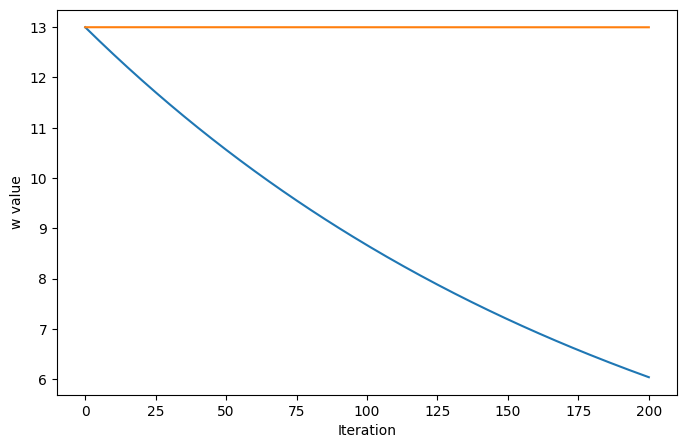

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def grad_descent_vals(w0, alpha, steps):
    w = w0
    history = [w]
    for _ in range(steps):
        grad = 2 * (w - 2)  
        w = w - alpha * grad
        history.append(w)
    return history

hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)

print("Final w (alpha=1/400):", hist_140[-1])
print("Final w (alpha=1/4000000):", hist_180[-1])

plt.figure(figsize=(8,5))
plt.plot(hist_140, label='alpha=1/400')
plt.plot(hist_180, label='alpha=1/4000000')
plt.xlabel('Iteration')
plt.ylabel('w value')
plt.show()

ALL THE BEST!